In [1]:
import pandas as pd
import json
import numpy as np
from PIL import Image

In [2]:
data = []
with open('polygons.jsonl','r') as file:
    for line in file:
        item = json.loads(line)
        data.append(item)
    

In [3]:
json_df = pd.DataFrame(data)
json_df

,id,annotations
0,0006ff2aa7cd,"[{'type': 'glomerulus', 'coordinates': [[[167,..."
1,00168d1b7522,"[{'type': 'glomerulus', 'coordinates': [[[511,..."
2,0033bbc76b6b,"[{'type': 'blood_vessel', 'coordinates': [[[16..."
3,003504460b3a,"[{'type': 'blood_vessel', 'coordinates': [[[40..."
4,004daf1cbe75,"[{'type': 'blood_vessel', 'coordinates': [[[14..."
...,...,...
1628,ff434af74304,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1629,ff4897b3eda6,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1630,ff66dec71c4c,"[{'type': 'blood_vessel', 'coordinates': [[[11..."
1631,ff99cdef0f2a,"[{'type': 'blood_vessel', 'coordinates': [[[24..."


In [4]:
import os

# Create the "Image" folder if it doesn't exist
image_folder = "Image_glomerulus"
os.makedirs(image_folder, exist_ok=True)



for i in range(len(json_df)):
    mask = np.zeros((512,512))
    name_id = json_df['id'][i]
    for annot in json_df['annotations'][i]:
        cords = annot['coordinates']
        if annot['type'] == "glomerulus":
            for cd in cords:
                rr, cc = np.array([i[1] for i in cd]), np.asarray([i[0] for i in cd])
                mask[rr, cc] = 1
    mask_image = Image.fromarray(mask.astype(np.uint8) * 255)
    mask_image
    
    # Define the file path for saving the mask image
    mask_image_path = os.path.join(image_folder, f"{name_id}.png")

    # Save the mask image
    mask_image.save(mask_image_path)

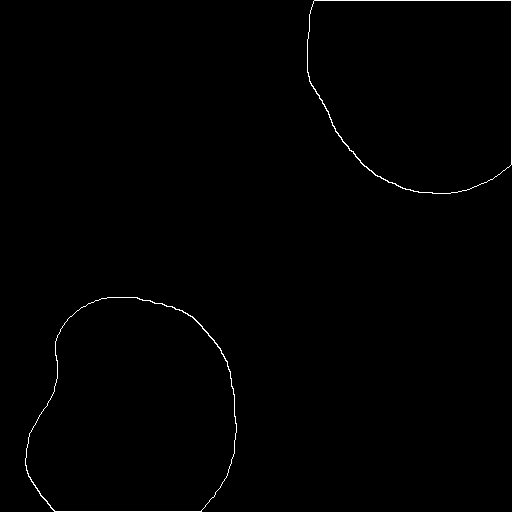

In [5]:
mask_image = Image.fromarray(mask.astype(np.uint8) * 255)
mask_image